# Superpixels Approach: Proof of Concept

## UCSD Dataset Exploration

### Libraries

In [1]:
import os
import cv2
import shutil
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

### Working Folder Setup

In [2]:
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Root folder in Google Drive for this project
DRIVE_BASE_PATH = '/content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2'

CORALSEG_TRAIN = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'Coralseg', "train")
CORALSEG_TEST = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'Coralseg', "test")
UCSD_MOSAICS_PATH_LABELS = os.path.join(DRIVE_BASE_PATH, 'data', 'Reef Support Benthic Data', 'UCSD Mosaics', 'Mosaics UCSD dataset', 'Mosaicos', "labels", "train")

### Sample Images

In [ ]:
image_file_path = os.path.join(CORALSEG_TRAIN, 'Image', 'FR3_2560_3072_4608_5120.jpg')
mask_file_path = os.path.join(CORALSEG_TRAIN, 'Mask', 'FR3_2560_3072_4608_5120.png')
mask_alt_file_path = os.path.join(UCSD_MOSAICS_PATH_LABELS, 'FR3_2560_3072_4608_5120.png')

if os.path.exists(image_file_path):
    print(f"Image: {image_file_path}")

if os.path.exists(mask_file_path):
    print(f"Mask: {mask_file_path}")

if os.path.exists(mask_alt_file_path):
    print(f"Mask (Alternate): {mask_alt_file_path}")

Image: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/train/Image/FR3_2560_3072_4608_5120.jpg
Mask: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/train/Mask/FR3_2560_3072_4608_5120.png
Mask (Alternate): /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/Reef Support Benthic Data/UCSD Mosaics/Mosaics UCSD dataset/Mosaicos/labels/train/FR3_2560_3072_4608_5120.png


### Image Visualizer

In [ ]:
image = cv2.imread(image_file_path)
mask = cv2.imread(mask_file_path)
mask_alt = cv2.imread(mask_alt_file_path)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
mask_alt = cv2.cvtColor(mask_alt, cv2.COLOR_BGR2RGB)

In [ ]:
print(f"Shape of Image Array: {image.shape}")
print(f"Shape of Mask Array: {mask.shape}")
print(f"Shape of Mask (Alternate) Array: {mask_alt.shape}")

Shape of Image Array: (512, 512, 3)
Shape of Mask Array: (512, 512, 3)
Shape of Mask (Alternate) Array: (512, 512, 3)


In [ ]:
print(f"Unique values in Mask: {np.unique(mask)}")
print(f"Unique values in Mask (Alternate): {np.unique(mask_alt)}")

Unique values in Mask: [0 1 2]
Unique values in Mask (Alternate): [ 8 12 25 27 29 30 31 34]


In [ ]:
def colorize_mask_labels(mask, color_mapping):
    mask_labels = mask[:,:,0][:]
    h, w = mask_labels.shape
    mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)

    for label, rgb in color_mapping.items():
        mask_rgb[mask_labels==label, :] = rgb

    return mask_rgb[:,:,:]

In [ ]:
mask_mapping = {
    0: (255, 0, 0), 1: (0, 255, 0), 2: (0, 0, 255)
    }
mask_alt_mapping = {
    24: (66, 10, 103), 25: (161, 228, 59), 26: (108, 2, 104), 27: (13, 49, 127),
    20: (184, 221, 46), 21: (54, 205, 145), 22: (14, 101, 210), 23: (199, 232, 230),
    28: (186, 99, 38), 29: (97, 140, 246), 1: (180, 27, 92), 0: (167, 18, 159),
    3: (49, 198, 135), 2: (104, 139, 233), 5: (118, 208, 133), 4: (98, 207, 26),
    7: (12, 72, 166), 6: (158, 118, 90), 9: (81, 195, 49), 8: (69, 79, 238),
    11: (160, 200, 222), 10: (221, 236, 52), 13: (16, 94, 7), 12: (255, 63, 216),
    15: (183, 108, 5), 14: (226, 47, 64), 17: (147, 154, 196), 16: (55, 252, 193),
    19: (108, 25, 95), 18: (233, 78, 165), 31: (36, 31, 118), 30: (44, 114, 202),
    34: (131, 69, 63), 33: (188, 100, 14), 32: (146, 77, 143)
    }

In [ ]:
mask_rgb = colorize_mask_labels(mask, mask_mapping)
mask_alt_rgb = colorize_mask_labels(mask_alt, mask_alt_mapping)

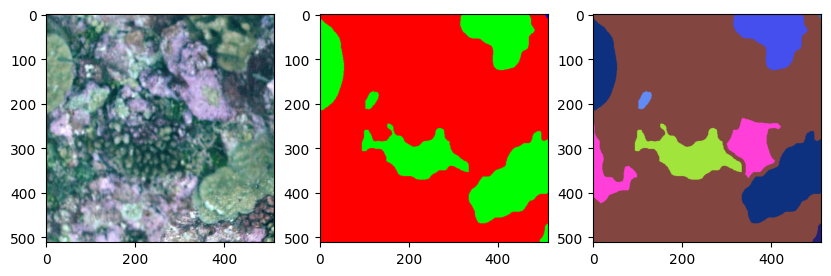

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax[0].imshow(image)
ax[1].imshow(mask_rgb)
ax[2].imshow(mask_alt_rgb)
plt.show()

In [ ]:
mask_minmax = cv2.normalize(mask, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
mask_alt_minmax = cv2.normalize(mask_alt, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

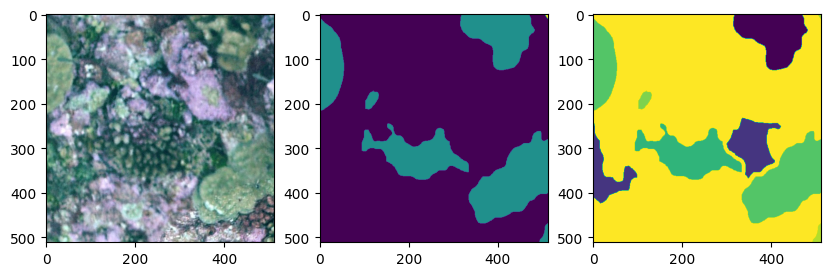

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax[0].imshow(image)
ax[1].imshow(mask_minmax[:,:,0])
ax[2].imshow(mask_alt_minmax[:,:,0])
plt.show()

### Splits Set Comparison

In [ ]:
CORALSEG_IMAGES_TRAIN = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'Coralseg', 'train', 'Image')
CORALSEG_IMAGES_VAL = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'Coralseg', 'val', 'Image')
CORALSEG_IMAGES_TEST = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'Coralseg', 'test', 'Image')
CORALSEG_LABELS_TEST = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'Coralseg', 'test', 'Mask')

UCSD_MOSAICS_LABELS_TRAIN = os.path.join(DRIVE_BASE_PATH, 'data', 'Reef Support Benthic Data', 'UCSD Mosaics', 'Mosaics UCSD dataset', 'Mosaicos', 'labels', 'train')
UCSD_MOSAICS_LABELS_TEST = os.path.join(DRIVE_BASE_PATH, 'data', 'Reef Support Benthic Data', 'UCSD Mosaics', 'Mosaics UCSD dataset', 'Mosaicos', 'labels', 'test')

In [ ]:
image_files = os.listdir(os.path.join(CORALSEG_IMAGES_TEST))
label_files = os.listdir(os.path.join(UCSD_MOSAICS_LABELS_TEST))

image_files = [x.replace('.jpg', '') for x in image_files]
label_files = [x.replace('.png', '') for x in label_files]

all_files = set(image_files) | set(label_files)

print("-"*80)
print(f"Images Folder: {CORALSEG_IMAGES_TEST}")
print(f"\t # of Image Files = {len(image_files)}")
print(f"\t # of Unique Image Files = {len(set(image_files))}")
print(f"Labels Folder: {UCSD_MOSAICS_LABELS_TEST}")
print(f"\t # of Label Files = {len(label_files)}")
print(f"\t # of Unique Label Files = {len(label_files)}")
print(f"Comparison:")
print(f"\t Total # of Unique Files = {len(all_files)}")
print(f"\t Intersection of Images & Labels = {len(set(image_files) & set(label_files))}")
print(f"\t Labels MINUS Images = {len(set(label_files) - set(image_files))}")
print(f"\t Images MINUS Labels = {len(set(image_files) - set(label_files))}")
print("-"*80)

--------------------------------------------------------------------------------
Images Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/test/Image
	 # of Image Files = 493
	 # of Unique Image Files = 493
Labels Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/Reef Support Benthic Data/UCSD Mosaics/Mosaics UCSD dataset/Mosaicos/labels/test
	 # of Label Files = 729
	 # of Unique Label Files = 729
Comparison:
	 Total # of Unique Files = 1154
	 Intersection of Images & Labels = 68
	 Labels MINUS Images = 661
	 Images MINUS Labels = 425
--------------------------------------------------------------------------------


In [ ]:
image_files = os.listdir(os.path.join(CORALSEG_IMAGES_TRAIN))
label_files = os.listdir(os.path.join(UCSD_MOSAICS_LABELS_TEST))

image_files = [x.replace('.jpg', '') for x in image_files]
label_files = [x.replace('.png', '') for x in label_files]

all_files = set(image_files) | set(label_files)

print("-"*80)
print(f"Images Folder: {CORALSEG_IMAGES_TRAIN}")
print(f"\t # of Image Files = {len(image_files)}")
print(f"\t # of Unique Image Files = {len(set(image_files))}")
print(f"Labels Folder: {UCSD_MOSAICS_LABELS_TEST}")
print(f"\t # of Label Files = {len(label_files)}")
print(f"\t # of Unique Label Files = {len(label_files)}")
print(f"Comparison:")
print(f"\t Total # of Unique Files = {len(all_files)}")
print(f"\t Intersection of Images & Labels = {len(set(image_files) & set(label_files))}")
print(f"\t Labels MINUS Images = {len(set(label_files) - set(image_files))}")
print(f"\t Images MINUS Labels = {len(set(image_files) - set(label_files))}")
print("-"*80)

--------------------------------------------------------------------------------
Images Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/train/Image
	 # of Image Files = 3938
	 # of Unique Image Files = 3938
Labels Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/Reef Support Benthic Data/UCSD Mosaics/Mosaics UCSD dataset/Mosaicos/labels/test
	 # of Label Files = 729
	 # of Unique Label Files = 729
Comparison:
	 Total # of Unique Files = 4079
	 Intersection of Images & Labels = 588
	 Labels MINUS Images = 141
	 Images MINUS Labels = 3350
--------------------------------------------------------------------------------


In [ ]:
image_files = os.listdir(os.path.join(CORALSEG_IMAGES_VAL))
label_files = os.listdir(os.path.join(UCSD_MOSAICS_LABELS_TEST))

image_files = [x.replace('.jpg', '') for x in image_files]
label_files = [x.replace('.png', '') for x in label_files]

all_files = set(image_files) | set(label_files)

print("-"*80)
print(f"Images Folder: {CORALSEG_IMAGES_VAL}")
print(f"\t # of Image Files = {len(image_files)}")
print(f"\t # of Unique Image Files = {len(set(image_files))}")
print(f"Labels Folder: {UCSD_MOSAICS_LABELS_TEST}")
print(f"\t # of Label Files = {len(label_files)}")
print(f"\t # of Unique Label Files = {len(label_files)}")
print(f"Comparison:")
print(f"\t Total # of Unique Files = {len(all_files)}")
print(f"\t Intersection of Images & Labels = {len(set(image_files) & set(label_files))}")
print(f"\t Labels MINUS Images = {len(set(label_files) - set(image_files))}")
print(f"\t Images MINUS Labels = {len(set(image_files) - set(label_files))}")
print("-"*80)

--------------------------------------------------------------------------------
Images Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/val/Image
	 # of Image Files = 492
	 # of Unique Image Files = 492
Labels Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/Reef Support Benthic Data/UCSD Mosaics/Mosaics UCSD dataset/Mosaicos/labels/test
	 # of Label Files = 729
	 # of Unique Label Files = 729
Comparison:
	 Total # of Unique Files = 1148
	 Intersection of Images & Labels = 73
	 Labels MINUS Images = 656
	 Images MINUS Labels = 419
--------------------------------------------------------------------------------


In [ ]:
image_files = os.listdir(os.path.join(CORALSEG_IMAGES_TEST))
label_files = os.listdir(os.path.join(CORALSEG_LABELS_TEST))

image_files = [x.replace('.jpg', '') for x in image_files]
label_files = [x.replace('.png', '') for x in label_files]

all_files = set(image_files) | set(label_files)

print("-"*80)
print(f"Images Folder: {CORALSEG_IMAGES_TEST}")
print(f"\t # of Image Files = {len(image_files)}")
print(f"\t # of Unique Image Files = {len(set(image_files))}")
print(f"Labels Folder: {CORALSEG_LABELS_TEST}")
print(f"\t # of Label Files = {len(label_files)}")
print(f"\t # of Unique Label Files = {len(label_files)}")
print(f"Comparison:")
print(f"\t Total # of Unique Files = {len(all_files)}")
print(f"\t Intersection of Images & Labels = {len(set(image_files) & set(label_files))}")
print(f"\t Labels MINUS Images = {len(set(label_files) - set(image_files))}, {set(label_files) - set(image_files)}")
print(f"\t Images MINUS Labels = {len(set(image_files) - set(label_files))}, {set(image_files) - set(label_files)}")
print("-"*80)

--------------------------------------------------------------------------------
Images Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/test/Image
	 # of Image Files = 493
	 # of Unique Image Files = 493
Labels Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/test/Mask
	 # of Label Files = 493
	 # of Unique Label Files = 493
Comparison:
	 Total # of Unique Files = 493
	 Intersection of Images & Labels = 493
	 Labels MINUS Images = 0, set()
	 Images MINUS Labels = 0, set()
--------------------------------------------------------------------------------


In [ ]:
image_files = os.listdir(os.path.join(CORALSEG_IMAGES_TRAIN))
label_files = os.listdir(os.path.join(UCSD_MOSAICS_LABELS_TRAIN))

image_files = [x.replace('.jpg', '') for x in image_files]
label_files = [x.replace('.png', '') for x in label_files]

all_files = set(image_files) | set(label_files)

print("-"*80)
print(f"Images Folder: {CORALSEG_IMAGES_TRAIN}")
print(f"\t # of Image Files = {len(image_files)}")
print(f"\t # of Unique Image Files = {len(set(image_files))}")
print(f"Labels Folder: {UCSD_MOSAICS_LABELS_TRAIN}")
print(f"\t # of Label Files = {len(label_files)}")
print(f"\t # of Unique Label Files = {len(label_files)}")
print(f"Comparison:")
print(f"\t Total # of Unique Files = {len(all_files)}")
print(f"\t Intersection of Images & Labels = {len(set(image_files) & set(label_files))}")
print(f"\t Labels MINUS Images = {len(set(label_files) - set(image_files))}")
print(f"\t Images MINUS Labels = {len(set(image_files) - set(label_files))}")
print("-"*80)

--------------------------------------------------------------------------------
Images Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/mask_labels/Coralseg/train/Image
	 # of Image Files = 3938
	 # of Unique Image Files = 3938
Labels Folder: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/Reef Support Benthic Data/UCSD Mosaics/Mosaics UCSD dataset/Mosaicos/labels/train
	 # of Label Files = 2885
	 # of Unique Label Files = 2885
Comparison:
	 Total # of Unique Files = 4516
	 Intersection of Images & Labels = 2307
	 Labels MINUS Images = 578
	 Images MINUS Labels = 1631
--------------------------------------------------------------------------------


### Observations

CoralSeg Dataset (located at benthic_datasets/mask_labels/CoralSeg) has train-val-test splits that are out of sync with CoralSeg Paper (link: https://webdiis.unizar.es/~anacris/papers/19AlonsoJFR_preprint.pdf).

"CoralSeg Dataset" is nothing but "UCSD Mosaics Dataset" as mentioned in CoralSeg Paper. CoralSeg Paper split UCSD Dataset into 4193 train images and 729 test images. The original 729 test ground truth masks can be seen in another folder within "Reef Support Benthic Data" drive shared by Yohan at the location UCSD Mosaics/Mosaics UCSD Dataset/Mosaicos/labels/test. It is safe to assume that this location contains the "original test set" of CoralSeg Paper based on the fact that the masks contain 35 classes as stated in the paper.

CoralSeg Dataset given for this challenge is not in sync with original UCSD Mosaics Dataset as the "original test set" of 729 images can be seen distributed across train (588 images), val (73 images) and test (68 images).

This mismatch makes CoralSeg Dataset unsuitable for comparison of results from the challenge with CoralSeg / USCD Mosaics benchmarks published in various literature.

So, it would be a good idea to relook at the train-val-test splits of our CoralSeg Dataset, discuss with Yohan about the reasoning for the current splits, and if necessary, re-align it to be in sync with CoralSeg Paper.

Links:
"Reef Support Benthic Data" Link: https://drive.google.com/drive/folders/10nyCTXklFmpKC-y4ph3GAnUK-sDu9y6l?usp=drive_link

## Point Label Aware Superpixels

### Dependencies

In [ ]:
!pip install torch_scatter torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 33.0 MB/s eta 0:00:00
  Created wheel for torch_scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=3544154 sha256=6ee79562d37a05649123cc5b5af3fac674d2537314e46c3ccffa1ef7077737a0
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch_scatter


### Code Setup

In [ ]:
!git clone https://github.com/sgraine/point-label-aware-superpixels.git

Cloning into 'point-label-aware-superpixels'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 74 (delta 29), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (74/74), 44.67 KiB | 5.58 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
# dowload the weights mentioned in GitHub and point to that file
PRE_TRAINED_WEIGHTS = os.path.join(DRIVE_BASE_PATH, 'models', 'standardization_C=100_step70000.pth')

# copy the weights file to the code folder created by git clone
if os.path.exists(PRE_TRAINED_WEIGHTS):
    print(f"Copying weights from {PRE_TRAINED_WEIGHTS}...")
    shutil.copyfile(
        PRE_TRAINED_WEIGHTS,
        '/content/point-label-aware-superpixels/standardization_C=100_step70000.pth'
        )
    print(os.listdir('/content/point-label-aware-superpixels'))

Copying weights from /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/models/standardization_C=100_step70000.pth...
['propagate.py', 'ssn.py', 'LICENSE.txt', 'spixel_utils.py', '.git', 'standardization_C=100_step70000.pth', 'README.md']


### Folder Setup

In [ ]:
INPUT_IMAGES = os.path.join('/content', 'inputs', 'images')
INPUT_LABELS = os.path.join('/content', 'inputs', 'labels')

os.makedirs(INPUT_IMAGES, exist_ok=True)
os.makedirs(INPUT_LABELS, exist_ok=True)

In [ ]:
OUTPUT_LABELS = os.path.join('/content', 'outputs', 'labels')
OUTPUT_LABELS_RGB = os.path.join('/content', 'outputs', 'labels-rgb')

os.makedirs(OUTPUT_LABELS, exist_ok=True)
os.makedirs(OUTPUT_LABELS_RGB, exist_ok=True)

### Input Data Setup

In [ ]:
# delete previous samples
for file_name in os.listdir(INPUT_IMAGES):
    os.remove(os.path.join(INPUT_IMAGES, file_name))

for file_name in os.listdir(INPUT_LABELS):
    os.remove(os.path.join(INPUT_LABELS, file_name))

In [ ]:
samples = ['FR3_2560_3072_4608_5120']

for sample in samples:
    # copy image file from CoralSeg dataset
    shutil.copyfile(
        os.path.join(CORALSEG_TRAIN, 'Image', f"{sample}.jpg"),
        os.path.join(INPUT_IMAGES, f"{sample}.jpg")
    )

    # copy species level dense ground truth labels from original UCSD Mosaics
    shutil.copyfile(
        os.path.join(UCSD_MOSAICS_PATH_LABELS, f"{sample}.png"),
        os.path.join(INPUT_LABELS, f"{sample}.jpg")
    )

### Run Superpixels Script

In [ ]:
%cd '/content/point-label-aware-superpixels'

/content/point-label-aware-superpixels


In [ ]:
!python /content/point-label-aware-superpixels/propagate.py -r {INPUT_IMAGES} -g {INPUT_LABELS} -l {OUTPUT_LABELS} -p {OUTPUT_LABELS_RGB}

received your values, setting some things up...
setup is complete, now iterating through your images...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/point-label-aware-superpixels/propagate.py:228: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(name='my_colormap', cmap=mymap)
propagation of point labels is complete!
evaluation script working...
per class mean intersection over union: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7954,
        0.0000, 0.0000, 0.0000, 0.9487, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 

### Verify Outputs

In [ ]:
def visualize_output(sample, mask_mapping):
    image = cv2.imread(os.path.join(INPUT_IMAGES, f"{sample}.jpg"))
    mask_gt = cv2.imread(os.path.join(INPUT_LABELS, f"{sample}.png"))
    mask_out_rgb = cv2.imread(os.path.join(OUTPUT_LABELS_RGB, f"{sample}.jpg"))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask_gt = cv2.cvtColor(mask_gt, cv2.COLOR_BGR2RGB)
    mask_out = cv2.cvtColor(mask_out_rgb, cv2.COLOR_BGR2RGB)

    mask_gt_rgb = colorize_mask_labels(mask_gt, mask_mapping)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
    ax[0].imshow(image)
    ax[0].set_title("Input Image")
    ax[1].imshow(mask_gt_rgb)
    ax[1].set_title("Ground Truth")
    ax[2].imshow(mask_out_rgb)
    ax[2].set_title("Superpixels Output")
    plt.show()

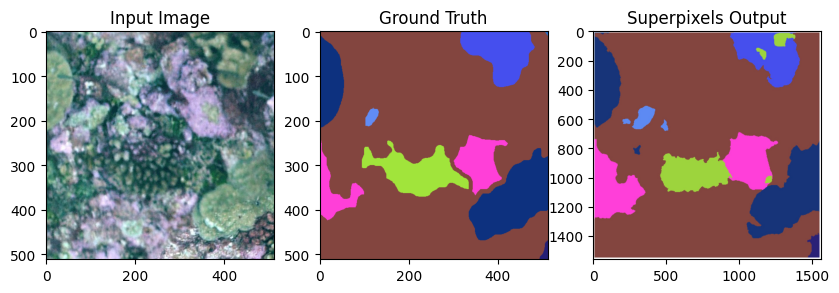

In [ ]:
for sample in samples:
    visualize_output(sample, mask_alt_mapping)